# Modelo de Previsão de Preços

Problema de negócio:

Realizar uma análise exploratória dos dados que evidencie como as colunas se relacionam entre si. Extrair informações que possam auxiliar na identificação de áreas com maior demanda e realizar o tratamento dos dados para o futuro desenvolvimento do modelo preditivo.

## Passo a Passo

 - Análise Exploratória dos dados
 - Questões de Negócio
 - Modelo Preditivo de Preços

## Introdução

Este projeto tem como objetivo a construção de um modelo preditivo utilizando dados abrangentes relacionados a anúncios de hospedagem disponíveis no Airbnb. O conjunto de dados inclui informações cruciais, como localização geográfica, tipo de espaço, preço por noite, e número de reviews. A proposta é desenvolver um modelo eficiente que possa estimar os preços das hospedagens, proporcionando uma ferramenta valiosa para anfitriões e hóspedes.

In [51]:
#importando as bibliotecas
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import mstats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split

In [52]:
dados_airbnb = pd.read_csv('/content/teste_indicium_precificacao.csv')

In [53]:
dados_airbnb.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Verificando o tipo e os valores non-nulos das variáveis

In [54]:
dados_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Após uma análise inicial, identificamos que algumas colunas do DataFrame apresentam valores nulos, como "nome", "host_name", "ultima_review" e "reviews_por_mes". Além disso, ressaltamos que as variáveis possuem tipos distintos, incluindo inteiros (int64), ponto flutuante (float64) e objetos (object). Essas informações são cruciais para o entendimento do conjunto de dados e fornecerão insights valiosos durante a análise exploratória e o desenvolvimento do modelo preditivo.

Informações Detalhadas do DataFrame:

Após uma inspeção detalhada utilizando o comando .info(), podemos destacar as colunas do conjunto de dados e informações adicionais, incluindo o número de entradas não nulas e os tipos de dados de cada coluna:

- id: Identificação única para cada anúncio (int64)
- nome: Nome da hospedagem (object)
- host_id: Identificação do usuário que hospedou o anúncio (int64)
- host_name: Nome do usuário que hospedou o anúncio (object)
- bairro_group: Nome do bairro onde o anúncio está localizado (object)
- bairro: Nome da área onde o anúncio está localizado (object)
- latitude: Latitude do local (float64)
- longitude: Longitude do local (float64)
- room_type: Tipo de espaço de cada anúncio (object)
- price: Preço por noite em dólares listado pelo anfitrião (int64)
- minimo_noites: Número mínimo de noites que o usuário deve reservar (int64)
- numero_de_reviews: Número de comentários dados a cada listagem (int64)
- ultima_review: Data da última revisão dada à listagem (object)
- reviews_por_mes: Número de avaliações fornecidas por mês (float64)
- calculado_host_listings_count: Quantidade de listagem por host (int64)
- disponibilidade_365: Número de dias em que o anúncio está disponível para reserva (int64)


Vamos verificar quais as variaveis mais apresenta valores nulos:

In [55]:
dados_airbnb.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Como é mostrado acima, as variaveis ultima_review e review por mês são as variáveis que mais apresenta nan (Not a Numbers). Vamos começar investigando essas variavei

In [56]:
dados_airbnb['ultima_review'].values

array(['2019-05-21', nan, '2019-07-05', ..., nan, nan, nan], dtype=object)

Bom, como temos datas atrelado a coluna ultima_review, é possível que as nan represente apenas datas das quais não tiveram reviews. Para verificar isso, vamos observar a coluna numero_de_review e verificar se existe reviews atreladas a essas nan. Se na coluna numero_de_review tiver dados maiores que 0 na mesma linha das nan, dai poderemos constatar que se trata de algum erro nos dados, e não de datas que não tenha reviews.

In [57]:
#Filtrando as linhas com nan
linhas_com_nan = dados_airbnb[dados_airbnb.isna().any(axis=1)]
display(linhas_com_nan)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
18,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
25,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
35,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
37,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Como podemos visualizar acima, não se trata de inconsistência nos dados, apenas de uma data que não teve reviews, e por isso não foi captada.

## Análise de correlação



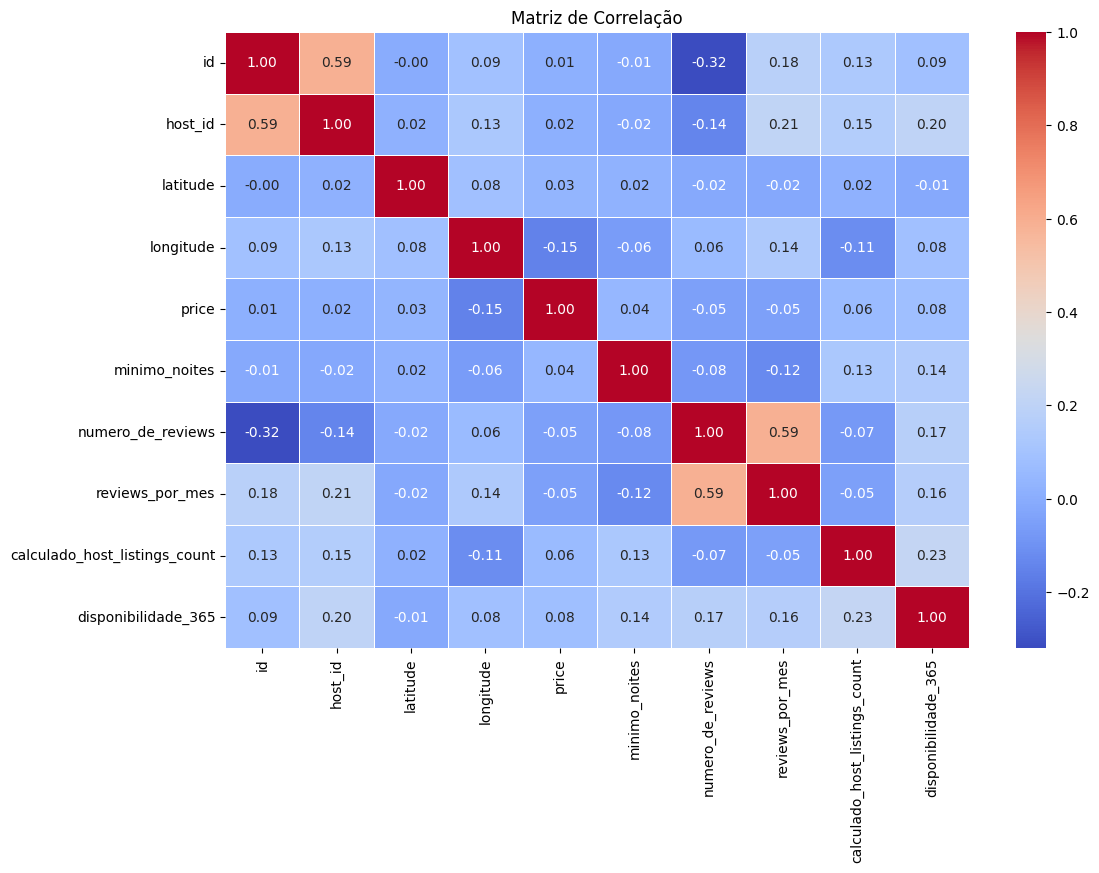

In [78]:
#Selecionar apenas as colunas numéricas
dados_numericos = dados_airbnb.select_dtypes(include=[np.number])

# Calcular a matriz de correlação
correlation_matrix = dados_numericos.corr()

# Gerar um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

No geral as correlações estão bem baixas. Apenas há uma correlação positiva nas variáveis numero_de_reviews e reviews_por_mês. Isso acontece por conta da variavel review_por_mês ser justamente o resultante da contagem de numero_de_reviews, durante 30 dias. Também é por isso que 0.55 representa uma correlação positiva, pois se o número de reviews aumentar, reviews por mês também aumenta. No mais, as correlações das outras variáveis estão baixas, quase que inexistentes.


In [79]:
#Retirando as colunas de identificadores
data_airbnb_subset = dados_airbnb.drop(['id', 'host_id', 'nome', 'host_name'], axis=1)
data_airbnb_subset.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,1.090928,7.144005,112.776169
std,0.054529,0.046157,240.156625,20.510741,44.550991,1.597294,32.952855,131.618692
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Nos resultados acima, ja temos algumas informações úteis, como por exemplo a localização das observações. A média de Latitude e Longitude são respectivamente: 40.728136	-73.951148, que segundo o [GoogleMaps](https://www.google.com/maps/place/40%C2%B043'41.3%22N+73%C2%B057'04.1%22W/@40.7280708,-73.9512108,17z/data=!4m11!1m6!3m5!2zNDDCsDQzJzQxLjMiTiA3M8KwNTcnMDQuMSJX!8m2!3d40.728136!4d-73.951148!10e5!3m3!8m2!3d40.728136!4d-73.951148?entry=ttu), estar localizado em Nova York. Como o  ***desvio padrão*** ou ***std*** é baixo, sugere que os outros registros das mesmas colunas, também estejam situados em Nova York, visto que um Desvio Padrão Baixo indica que os dados estão mais concentrados em torno da média.


## Análise Bivariada

<ipython-input-58-2ed433bdf397>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='room_type', y='price', data=dados_airbnb, ci=None)  # 'ci=None' para remover intervalo de confiança


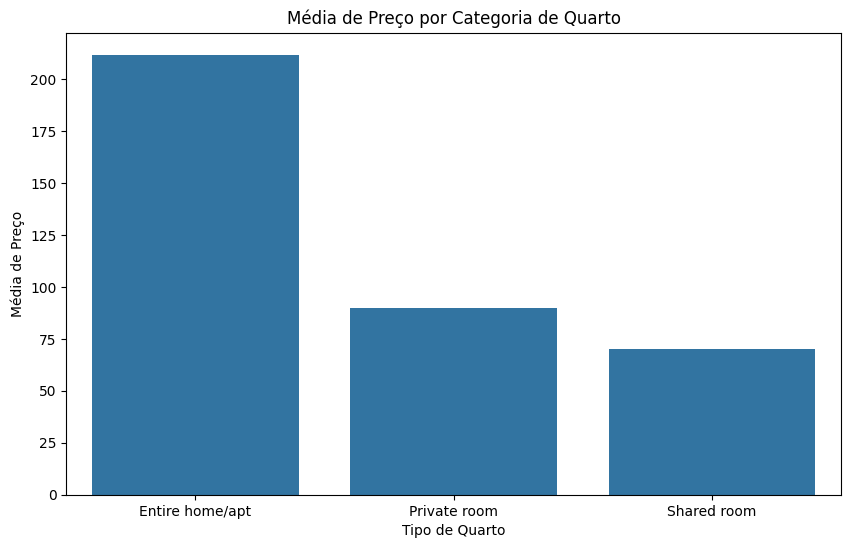

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=dados_airbnb, ci=None)  # 'ci=None' para remover intervalo de confiança
plt.title('Média de Preço por Categoria de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Média de Preço')
plt.show()

Aparentemente casas inteiras tendem a ter preços mais altos.

Para verificar essa premissa, vamos verificar se existe diferença siginificante na média de preços entre as categorias.

- Hipótese Nula (H0):

A média de preços nas duas categorias é igual.
- Hipótese Alternativa (H1):

A média de preços nas duas categorias é diferente.

 Para testar essas hipóteses vamos usar o teste t de Student para amostras independentes, que é apropriado quando estamos comparando as médias de dois grupos distintos (nesse caso, os diferentes tipos de quartos).

In [59]:

# Criar subconjuntos para cada categoria de 'room_type'
casa_inteira = dados_airbnb[dados_airbnb['room_type'] == 'Entire home/apt']['price']
sala_particular = dados_airbnb[dados_airbnb['room_type'] == 'Private room']['price']
quarto_compartilhado = dados_airbnb[dados_airbnb['room_type'] == 'Shared room']['price']

# Realizar teste t de Student para comparar as médias
statistic_casa_inteira_vs_particular, p_value_casa_inteira_vs_particular = ttest_ind(casa_inteira, sala_particular)
statistic_casa_inteira_vs_compartilhado, p_value_casa_inteira_vs_compartilhado = ttest_ind(casa_inteira, quarto_compartilhado)
statistic_particular_vs_compartilhado, p_value_particular_vs_compartilhado = ttest_ind(sala_particular, quarto_compartilhado)

# Imprimir os resultados
print(f'Teste t para Casa Inteira vs. Sala Particular: Estatística = {statistic_casa_inteira_vs_particular}, p-valor = {p_value_casa_inteira_vs_particular}')
print(f'Teste t para Casa Inteira vs. Quarto Compartilhado: Estatística = {statistic_casa_inteira_vs_compartilhado}, p-valor = {p_value_casa_inteira_vs_compartilhado}')
print(f'Teste t para Sala Particular vs. Quarto Compartilhado: Estatística = {statistic_particular_vs_compartilhado}, p-valor = {p_value_particular_vs_compartilhado}')



Teste t para Casa Inteira vs. Sala Particular: Estatística = 56.742273703833284, p-valor = 0.0
Teste t para Casa Inteira vs. Quarto Compartilhado: Estatística = 16.93714183274675, p-valor = 5.1940869082135445e-64
Teste t para Sala Particular vs. Quarto Compartilhado: Estatística = 4.1344290842051, p-valor = 3.570734984691611e-05


Os resultados dos testes t indicam que há diferenças estatisticamente significativas nas médias de preços entre os diferentes tipos de quartos. Vamos interpretar cada teste individualmente:

**- Casa Inteira vs. Sala Particular:**

 Estatística = 56.74
 P-valor = 0.0 (muito próximo de zero)
 Com um p-valor extremamente baixo, rejeitamos a hipótese nula. Há evidências estatísticas significativas de que as médias de preços entre casas inteiras e quartos particulares são diferentes.

**- Casa Inteira vs. Quarto Compartilhado:**

 Estatística = 16.94
 P-valor = 5.19e-64
 Mais uma vez, o p-valor é muito próximo de zero, indicando diferenças significativas nas médias de preços entre casas inteiras e quartos compartilhados.

**- Sala Particular vs. Quarto Compartilhado:**

 Estatística = 4.13
 P-valor = 3.57e-05
 O p-valor é baixo, indicando que há evidências estatísticas significativas de diferenças nas médias de preços entre quartos particulares e quartos compartilhados.

 Em todos os casos, como os p-valores são muito baixos, podemos concluir que há uma diferença estatisticamente significativa nas médias de preços entre os diferentes tipos de quartos. Isso fornece uma base estatística para a observação anterior de que casas inteiras tendem a ter preços mais altos em comparação com quartos particulares e quartos compartilhados.



Uma opção interessante de se observar é a distribuição da demanda com base em intervalos de preços. O que se espera com esse tipo de gráfico é um pico de demanda perante uma determinada faixa de preço, até por se tratarem de preços mais acessívies, e na medida em que os preços vão subindo as demandas vão descendo.

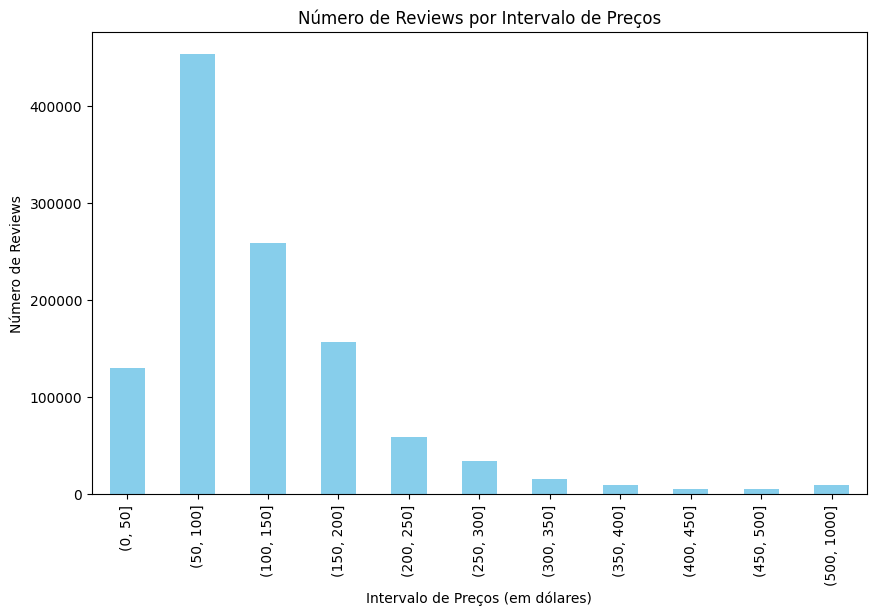

In [60]:
intervalos_preco = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]
dados_airbnb['intervalo_preco'] = pd.cut(dados_airbnb['price'], bins=intervalos_preco)

# plotando o histograma
plt.figure(figsize=(10, 6))
dados_airbnb.groupby('intervalo_preco')['numero_de_reviews'].sum().plot(kind='bar', color='skyblue')
plt.title('Número de Reviews por Intervalo de Preços')
plt.xlabel('Intervalo de Preços (em dólares)')
plt.ylabel('Número de Reviews')
plt.show()

Observando o gráfico acima, percebemos que os resultados estão em linha com as expectativas. Com base nesse gráfico e no gráfico da média de preços por categoria, há um indicativo positivo de que a categoria "Private-Room" pode ser uma das que mais gera demanda. Isso pode ser motivado por diversos fatores, como comodidade, acessibilidade devido aos preços, preferência dos viajantes, entre outros.

Vamos continuar explorando as variáveis e como elas se relaciona com nossa variavel alvo preço.

Vamos ver como grupo_de_bairros se distribui com base na média de preços.

In [61]:
bairros_unicos = dados_airbnb['bairro_group'].unique()
bairros_unicos

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

<ipython-input-62-f0061086d8e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bairro_group', y='price', data=dados_airbnb, estimator='mean', palette='viridis')


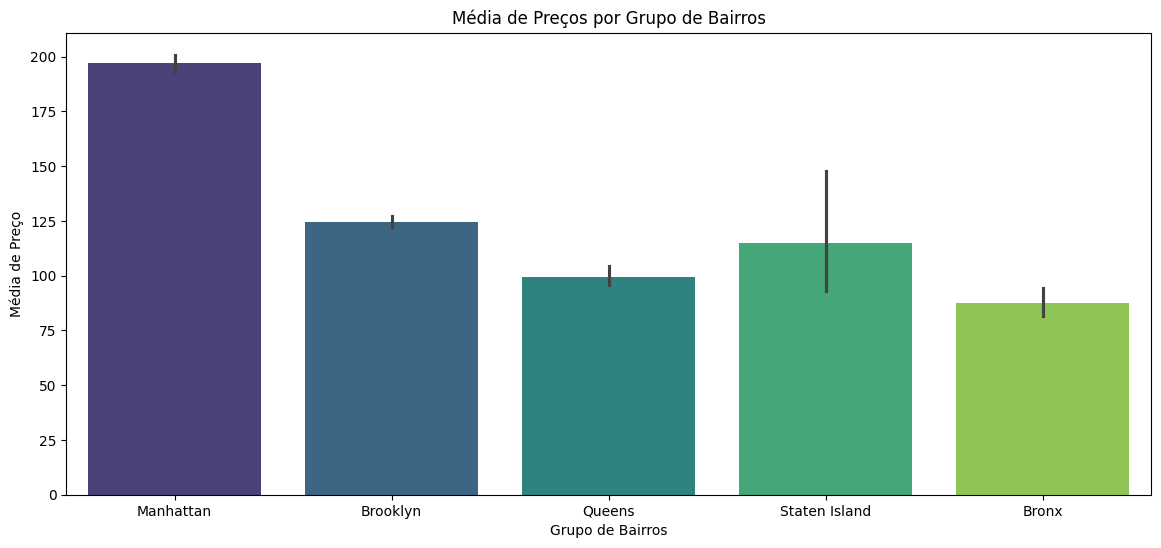

In [62]:
plt.figure(figsize=(14, 6))
sns.barplot(x='bairro_group', y='price', data=dados_airbnb, estimator='mean', palette='viridis')
plt.title('Média de Preços por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Média de Preço')
plt.show()

Nesse gráfico, observamos Manhattan como o bairro com a média de preço mais alta. Outra observação importante é que Staten Island apresenta um erro padrão muito alto, o que pode indicar a presença de um outlier causado por alguma propriedade com um preço muito elevado. Vamos investigar isso a fundo!

Agora, vamos plotar um Box Plot para visualizar a distribuição dos dados para cada bairro:

<ipython-input-77-55d04d262ff7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bairro_group', y='price', data=dados_airbnb, palette='viridis')


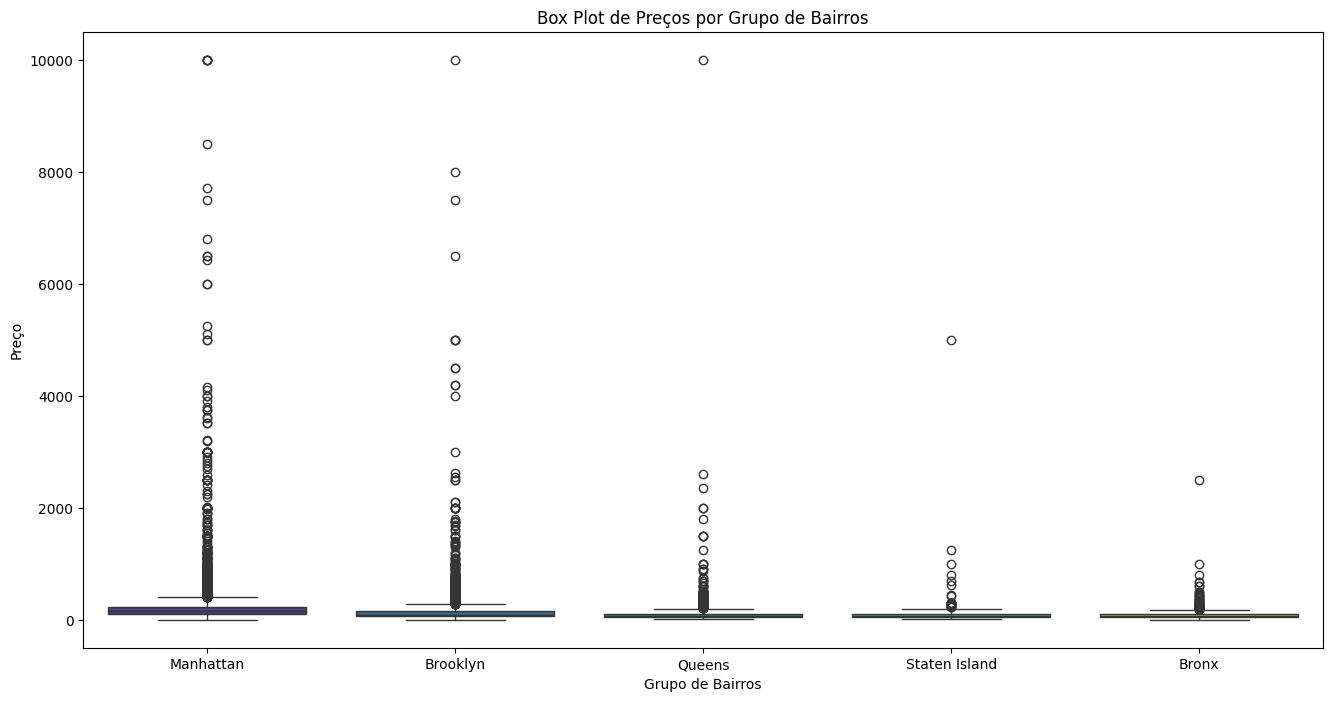

In [77]:

plt.figure(figsize=(16, 8))
sns.boxplot(x='bairro_group', y='price', data=dados_airbnb, palette='viridis')

# Adicionar título e rótulos aos eixos
plt.title('Box Plot de Preços por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Preço')


# Exibir o gráfico
plt.show()

Claramente, estamos lidando com a presença de outliers nos nossos dados. Dado que enfrentamos esse tipo de problema, para avançar no desenvolvimento do nosso modelo preditivo, é necessário tratar os nossos dados. Portanto, vamos avançar nas nossas análises e seguir para a próxima etapa:

## Questões de Negócio

**1- Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?**

RESPOSTA:
Eu indicaria em Manhattan ou Bronx. Primeiro Manhattan, pois mesmo a média de preço sendo alta, a demanda também é. O que indica que as opções disponíveis, são boas. E Bronx por conta da média de preço der a mais baixa, o que faz  com que a todo caso tenha opções acessívies.

**2- O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?**

Sim, geralmente o número mínimo de noites e a disponibilidade podem afetar os preços. Propriedades com maior disponibilidade ao longo do ano podem ter preços mais baixos, enquanto um número mínimo de noites pode influenciar a demanda

**3- Existe algum padrão no texto do nome do local para lugares de mais alto valor?**


## Pré-Processamento

Conforme identificamos na análise exploratória, nossos dados possuem uma considerável quantidade de valores nulos em algumas colunas, além da presença de outliers nos dados. Vamos iniciar o tratamento dos valores nulos:

In [64]:
#Contagem de valores nulos.
na_count = dados_airbnb.isna().sum()
na_count

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
intervalo_preco                    250
dtype: int64

Para tratar os dados das colunas **name** e **host_name**, vamos preencher com o a string "Desconhecido", com o intuito de indicar que a informação não estar disponível.

In [65]:
# Preenchendo valores nulos nas colunas "nome" e "host_name".
dados_airbnb['nome'].fillna('Desconhecido', inplace=True)
dados_airbnb['host_name'].fillna('Desconhecido', inplace=True)

***"ultima_review" e "reviews_por_mes":***
- Valores nulos nestas colunas como o investigado, foi por conta da ausência de reviews. Podemos preencher os valores nulos em "ultima_review" com alguma data padrão que indique que não ouve previsão, e os valores nulos em "reviews_por_mes" com zero.

In [66]:
# Preenchendo valores nulos em "ultima_review" com uma data padrão
dados_airbnb['ultima_review'].fillna('0000-00-00', inplace=True)
# Preenchendo valores nulos em "reviews_por_mes" com zero
dados_airbnb['reviews_por_mes'].fillna(0, inplace=True)

In [67]:
#verificando as colunas:
dados_airbnb.isna().sum()

id                                 0
nome                               0
host_id                            0
host_name                          0
bairro_group                       0
bairro                             0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimo_noites                      0
numero_de_reviews                  0
ultima_review                      0
reviews_por_mes                    0
calculado_host_listings_count      0
disponibilidade_365                0
intervalo_preco                  250
dtype: int64

Agora que os valores nulos foram preenchidos, vamos lidar com os outliers. Primeiramente, vamos identificar os outliers na nossa variável preditora, "price".

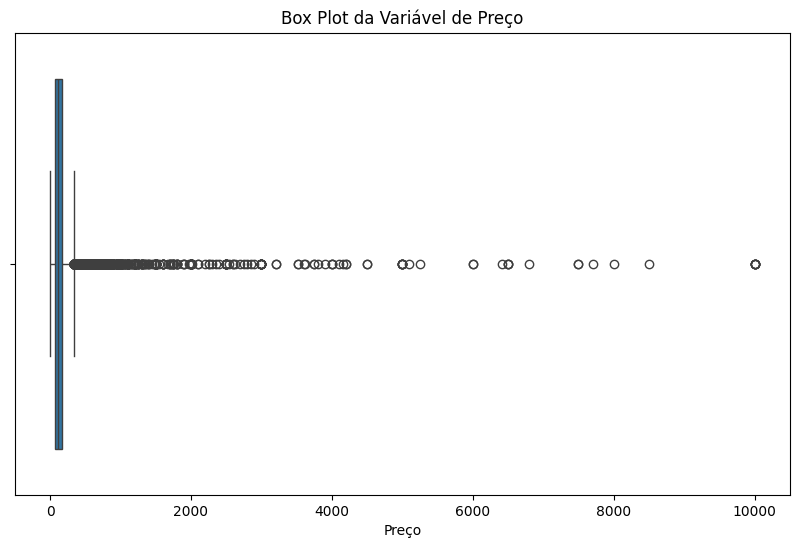

In [68]:
#Plotando o gráfico Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados_airbnb['price'])
plt.title('Box Plot da Variável de Preço')
plt.xlabel('Preço')
plt.show()

Verificando a variável "price", observamos que ela possui uma grande quantidade de outliers. Vamos aplicar uma transformação logarítmica para reduzir os efeitos desses registros nos dados.

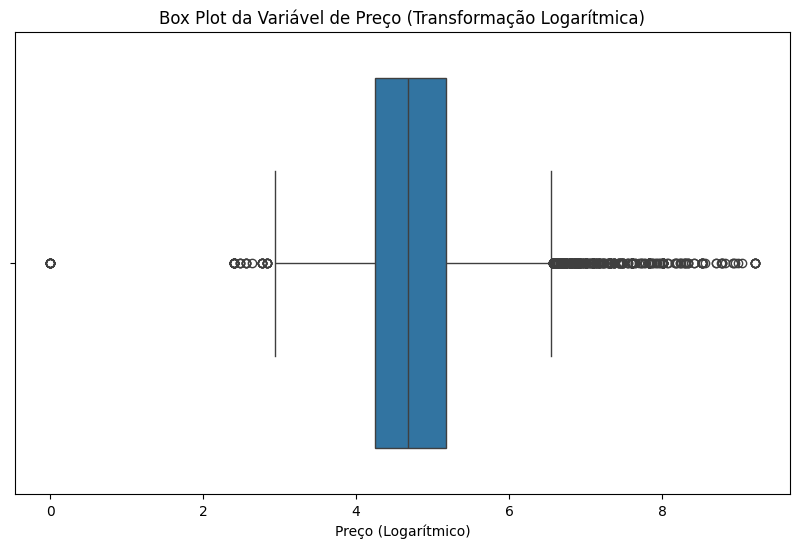

In [69]:
dados_airbnb_transformados = dados_airbnb.copy()

# Aplicar a transformação logarítmica na variável de preço
dados_airbnb_transformados['price_log'] = np.log1p(dados_airbnb['price'])
#plotar o gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados_airbnb_transformados['price_log'])
plt.title('Box Plot da Variável de Preço (Transformação Logarítmica)')
plt.xlabel('Preço (Logarítmico)')
plt.show()

Já é possível observar uma melhora significativa, mas ainda não é o suficiente. Precisamos tratar essa grande quantidade de outliers ainda presentes, mesmo após a transformação.

Para contornar esse problema, vamos aplicar a Winsorização.

"Winsorização é a transformação de estatísticas limitando valores extremos nos dados estatísticos para reduzir o efeito de valores atípicos possivelmente espúrios. Recebeu o nome do engenheiro que se tornou bioestatístico, Charles P. Winsor (1895–1951). O efeito é o mesmo que o corte no processamento de sinal." Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Winsoriza%C3%A7%C3%A3o)

Como podemos ver acima, ainda existe outliers no limite inferior. Vamos continuar aplicando a técnica.

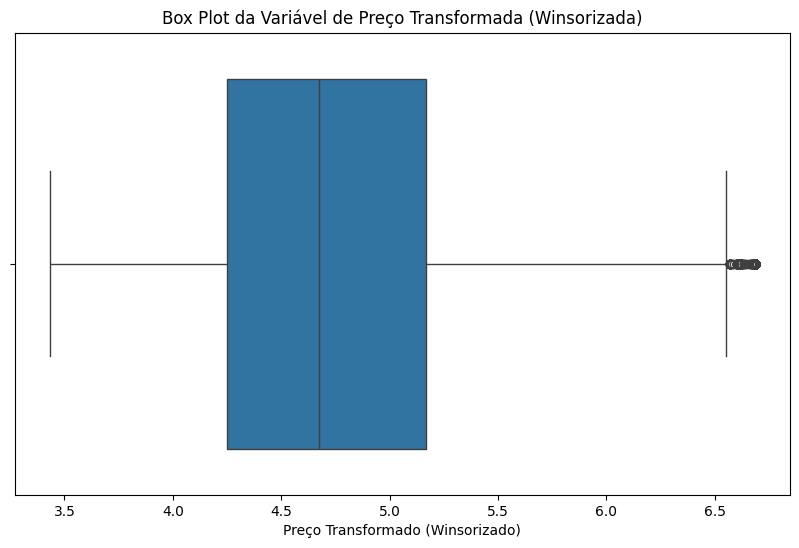

In [70]:
# Definir os limites superior e inferior para Winsorizing
limite_superior = np.percentile(dados_airbnb_transformados['price_log'], 99)
limite_inferior = np.percentile(dados_airbnb_transformados['price_log'], 1)

# Aplicar Winsorizing à variável transformada para valores acima do limite superior
dados_airbnb_transformados['price_log_winsorized'] = mstats.winsorize(
    dados_airbnb_transformados['price_log'], limits=(0.01, 0.01)
)

# Substituir valores abaixo do limite inferior pelo limite inferior
dados_airbnb_transformados['price_log_winsorized'] = np.where(
    dados_airbnb_transformados['price_log'] < limite_inferior,
    limite_inferior,
    dados_airbnb_transformados['price_log_winsorized']
)

# Criar um novo boxplot para a variável transformada
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados_airbnb_transformados['price_log_winsorized'])
plt.title('Box Plot da Variável de Preço Transformada (Winsorizada)')
plt.xlabel('Preço Transformado (Winsorizado)')
plt.show()


Vamos verificar a proporção dos registros fora do escopo:

In [76]:
# Contar o número de observações fora do escopo
observacoes_fora_escopo = dados_airbnb_transformados[
    (dados_airbnb_transformados['price_log'] > limite_superior) |
    (dados_airbnb_transformados['price_log'] < limite_inferior)
]

# Calcular a proporção
proporcao_fora_escopo = len(observacoes_fora_escopo) / len(dados_airbnb_transformados)

print(f'Proporção de Observações Fora do Escopo: {proporcao_fora_escopo:.2%}')



Proporção de Observações Fora do Escopo: 1.80%


In [ ]:
#Salvar o Dataframe transformado
dados_airbnb_transformados.to_csv("teste_indicium_pt_2", index=False)

Ainda há a presença de outliers; no entanto, por representarem apenas 1,80% dos dados, podemos prosseguir e encerrar esta etapa da (EDA).

## Conclusão

Na análise exploratória dos dados, pudemos observar o comportamento interativo das variáveis. Combinamos informações para extrair insights e formulamos questionamentos aos dados. Além disso, realizamos o pré-processamento dos dados, identificando a origem dos valores ausentes e analisando sua distribuição nos dados. Procedemos ao tratamento de outliers e criamos novas colunas que auxiliarão no desenvolvimento do modelo.